In [ ]:
#Task: simple neural network using
#VGG (a convolutional neural network)
#Sigmoid and relu activatoin function 
#Epoch 10 and epoch early stopping callback 
#Dataset: FashionMNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import *

In [3]:
#loading dataset (tf.keras.datasets.fashion_mnist.load_data())

#Mnist database
FashionMNIST = tf.keras.datasets.fashion_mnist

#unpackingdata
#Dataset of 28x28 images with 10 classifications
#70000 images: 60000 for training, 10000 for testing 

(x_train, y_train), (x_test, y_test) = FashionMNIST.load_data()

In [33]:
'''
#(28,28,1) --> (28,28,3) 
x_train = np.expand_dims(x_train, axis=-1)
x_train_t = np.repeat(x_train, 3, axis=-1)
x_test_t = np.expand_dims(x_test, axis=-1)
x_test_t = np.repeat(x_test, 3, axis=-1)

#normalization of data
x_train_t = x_train_t/255
x_test_t = x_test_t/255
'''

In [6]:
x_train_n.shape

(60000, 28, 28, 3)

In [16]:
x_train

(60000, 28, 28)

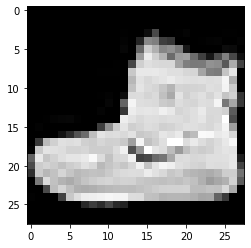

In [14]:
first_array=x_train_n[0]
plt.imshow(first_array)
plt.show()

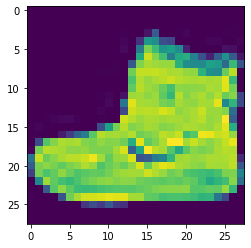

In [17]:
second_array=x_train[0]
plt.imshow(second_array)
plt.show()

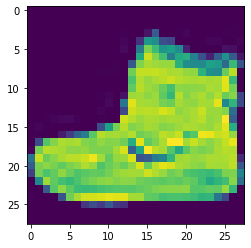

In [20]:
x_t = x_train/255.0
third_array=x_t[0]
plt.imshow(third_array)
plt.show()

In [5]:
x_train_f = x_train/255.0
x_test_f = x_train/255.0

In [38]:
x_train_f.shape

(60000, 28, 28)

In [7]:
#takes up too much memory to change shape of 60000 items from (28,28) to (224,224)
'''
x_test_f =np.empty((10000,224,224,3))
import cv2
for a in range(10000):
    img = x_test_n[a]
    x_test_f[a] = cv2.resize(img, dsize=(224, 224))
    
x_train_f =np.empty((10000,224,224,3))
for a in range(10000):
    img = x_train_n[a]
    x_train_f[a] = cv2.resize(img, dsize=(224, 224))
'''

In [ ]:
#did not work 
'''original_dim = (28, 28, 3)
target_size = (224,224)
input = tf.keras.layers.Input(original_dim)
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, target_size))(input)'''

In [ ]:
#changed plans --> did not change shape of image and instead changed model structure
#x_train_n = (224,224,3) attemps
#x_train_f = data currently using to train data with a (28,28,1) shape

In [39]:
#implimenting VGG:
'''
16 layers of VGG16
1.Convolution using 64 filters
2.Convolution using 64 filters + Max pooling
3.Convolution using 128 filters
4. Convolution using 128 filters + Max pooling
5. Convolution using 256 filters
6. Convolution using 256 filters
7. Convolution using 256 filters + Max pooling
8. Convolution using 512 filters
9. Convolution using 512 filters
10. Convolution using 512 filters+Max pooling
11. Convolution using 512 filters
12. Convolution using 512 filters
13. Convolution using 512 filters+Max pooling
14. Fully connected with 4096 nodes
15. Fully connected with 4096 nodes
16. Output layer with Softmax activation with 1000 nodes.
'''
#understanding VGG: 
#https://medium.com/nerd-for-tech/vgg-16-easiest-explanation-12453b599526
#https://iq.opengenus.org/vgg16/
#multiple 3×3 kernel-sized filters one after another
#Cov1 layer is of a fixed size of 224 x 224 RGB image
#filters used with a very small receptive field: 3×3 
#padding is "same"
#guide for code: https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

model = Sequential()

#28,28,1 input shape
model.add(Conv2D(input_shape= (28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

#padding same to prevent negative dimension
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding="same" ))

#3d to 2d
model.add(Flatten())

model.add(Dense(units=96,activation="relu"))
model.add(Dense(units=96,activation="relu"))

#10 units for 10 classifications 
model.add(Dense(units=10, activation="softmax"))


In [41]:
#compile and optimizer

opt = tf.keras.optimizers.Adam(lr = 0.001, decay=0.006)

model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics =['accuracy'])

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')

model.fit(x_train_f, y_train, validation_data= (x_test_f, y_test), callbacks = [early] )

1875/1875 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7297

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [ ]:
#filters from original VGG, too big so changed all to 64 

#using only relu --> accuracy: 0.7125 , loss: 0.7126
#second try using relu --> acurracy: 0.7297, loss: 0.6900
#took 5-8mins to complete

#sigmoid --> accuracy stays around 0.1200 give or take


